In [1]:
##Bring in the appropriate packages
import datetime
import time
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import pickle

In [2]:
df=pd.read_csv('AtlantaPrices_Processed.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14303 entries, 0 to 14302
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   destinationAirport   14303 non-null  object 
 1   isBasicEconomy       14303 non-null  bool   
 2   isNonStop            14303 non-null  bool   
 3   baseFare             14303 non-null  float64
 4   seatsRemaining       14303 non-null  float64
 5   totalTravelDistance  14303 non-null  float64
 6   totalTravelDuration  14303 non-null  int64  
 7   weeknum              14303 non-null  int64  
 8   time_of_departure    14303 non-null  object 
 9   time_of_arrival      14303 non-null  object 
 10  no_airlines          14303 non-null  int64  
 11  no_layovers          14303 non-null  int64  
 12  segmentsCabinCode_1  14303 non-null  object 
dtypes: bool(2), float64(3), int64(4), object(4)
memory usage: 1.2+ MB


In [4]:
df.head()

,destinationAirport,isBasicEconomy,isNonStop,baseFare,seatsRemaining,totalTravelDistance,totalTravelDuration,weeknum,time_of_departure,time_of_arrival,no_airlines,no_layovers,segmentsCabinCode_1
0,BOS,False,True,217.67,9.0,947.0,149,15,Mid-Day,Mid-Day,1,1,coach
1,BOS,False,True,217.67,4.0,947.0,150,15,Morning,Mid-Day,1,1,coach
2,BOS,False,True,217.67,9.0,947.0,150,15,Mid-Day,Mid-Day,1,1,coach
3,BOS,False,True,217.67,8.0,947.0,152,15,Mid-Day,Night,1,1,coach
4,BOS,False,True,217.67,9.0,947.0,154,15,Mid-Day,Mid-Day,1,1,coach


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


# Step 1: One-hot encode non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['int', 'float']).columns

one_hot_encoder = OneHotEncoder(sparse=False) #, drop='first')  # 'drop' is set to 'first' to avoid the dummy variable trap
encoded_columns = pd.DataFrame(one_hot_encoder.fit_transform(df[non_numeric_columns]))
encoded_columns.columns = one_hot_encoder.get_feature_names_out(non_numeric_columns)

df_PCA = pd.concat([df.drop(columns=non_numeric_columns), encoded_columns], axis=1)

# Step 2: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_PCA)

# Step 3: Perform PCA
# You can specify the number of components you want to keep
num_components = 24  # Change this to your desired number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_data)

# Now, pca_result contains the transformed data after PCA
# You can convert it back to a DataFrame if needed
pca_dataframe = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(num_components)])

# Print the resulting DataFrame
print(pca_dataframe.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.510904  1.346207 -1.111237 -0.266321  0.345049 -0.502365  0.346044   
1 -2.214743  1.294716 -2.010674  0.675326 -1.345372  0.146349 -0.364235   
2 -2.509008  1.345456 -1.111303 -0.265948  0.344966 -0.502610  0.346149   
3 -2.056213  1.335252  0.939625 -1.113356  0.755003 -0.137005  0.424440   
4 -2.501422  1.342452 -1.111564 -0.264455  0.344636 -0.503591  0.346569   

        PC8       PC9      PC10  ...      PC15      PC16      PC17      PC18  \
0 -1.200936  0.507735  0.109420  ...  0.468660 -0.332489 -1.646605  0.391982   
1  0.232629  0.206521  0.167301  ...  0.619541 -0.425484 -1.047393  0.129720   
2 -1.201049  0.507899  0.109342  ...  0.468689 -0.332562 -1.646556  0.392093   
3 -0.585273  0.247655  0.020650  ...  0.381677 -0.371912 -1.381600  0.230496   
4 -1.201497  0.508553  0.109030  ...  0.468803 -0.332852 -1.646363  0.392536   

       PC19      PC20      PC21      PC22      PC23      PC24  
0 -1

/Users/luisgrisanti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
#Perform PCA with automatic determination of components
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Determine the number of components based on a threshold (e.g., 95% variance explained)
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
num_components = sum(cumulative_variance_ratio >= 0.95)

# Apply PCA with the determined number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_data)

# Now, pca_result contains the transformed data after PCA
pca_dataframe = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(num_components)])

# Print the resulting DataFrame and explained variance
print(pca_dataframe.head())
print(f"Number of components: {num_components}")
print(f"Cumulative explained variance: {cumulative_variance_ratio[num_components - 1]:.2%}")


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.510743  1.334651 -1.113796 -0.266000  0.335680 -0.523038 -0.310123   
1 -2.215048  1.308225 -2.004678  0.678794 -1.326986  0.170188  0.346119   
2 -2.508846  1.333899 -1.113862 -0.265627  0.335596 -0.523286 -0.310226   
3 -2.056296  1.330283  0.941504 -1.109981  0.758728 -0.147122 -0.392610   
4 -2.501261  1.330889 -1.114128 -0.264134  0.335259 -0.524275 -0.310635   

        PC8       PC9      PC10      PC11      PC12  
0 -1.188059  0.596352  0.122050 -2.286555  0.263634  
1  0.242575  0.134150  0.091343 -2.269586  0.352441  
2 -1.188171  0.596523  0.121978 -2.286526  0.263618  
3 -0.554870  0.269914 -0.006713 -2.234057  0.287737  
4 -1.188618  0.597209  0.121686 -2.286411  0.263552  
Number of components: 12
Cumulative explained variance: 63.92%


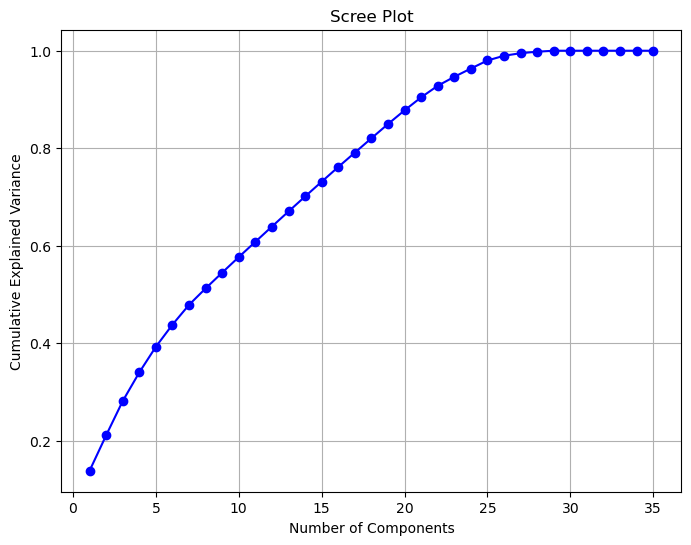

In [7]:
# Scree Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

Mean Squared Error: 9482.177962887103
R-squared: 0.6325022446264394


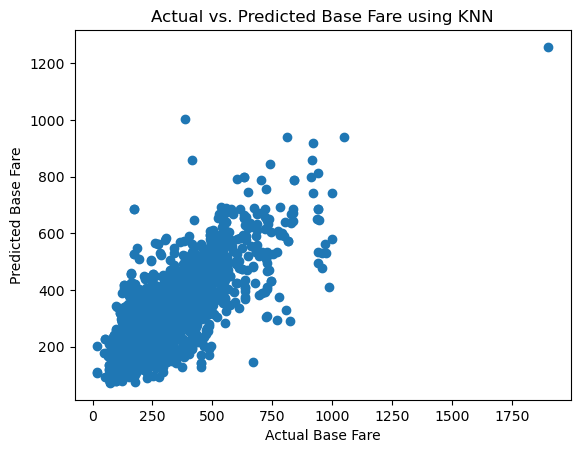

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the necessary columns

# Extracting features (independent variables) and the target variable
X = df.drop(['baseFare'], axis=1)
y = df['baseFare']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

# Separating numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combining preprocessing and KNN model into a single pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', KNeighborsRegressor(n_neighbors=5))])

# Fitting the pipeline
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plotting residual values
# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Base Fare')
plt.ylabel('Predicted Base Fare')
plt.title('Actual vs. Predicted Base Fare using KNN')
plt.show()